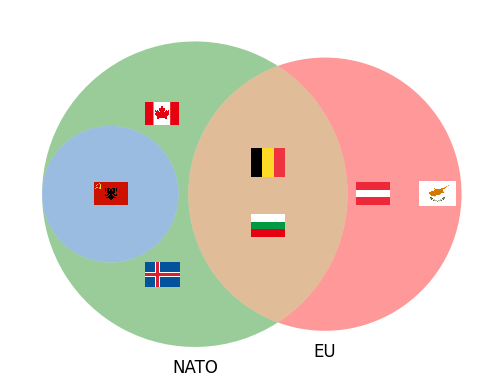

In [104]:
import math
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from matplotlib_venn import venn2
from matplotlib_venn import venn3

def im_rend(list_data, ax=None): 
    if ax is None: 
        ax = plt.gca() 
    artists = [] 
    for data in list_data:
        try: 
            data["image"] = plt.imread(data["image"]) 
        except:
            pass 
        im = OffsetImage(data["image"], zoom=data["zoom"])
        ab = AnnotationBbox(im, (data["x"], data["y"]), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab)) 
    return artists 

def calc_pos_offset(center, div, length, mode):
    if (div > 1):
        interval = length / div
    else:
        interval = 0
    list_offset = []
    for d in range(div):
        offset = d * interval - interval / 2
        if mode == "row":
            list_offset.append(center - offset)
        elif mode == "col":
            list_offset.append(center + offset)
    return list_offset
    
def get_pos(cx, cy, num_elements, height, width, column):
    list_pos = []
    rows = math.ceil(num_elements / column)
    row_offset = calc_pos_offset(cy, rows, height, "row")
    for r in range(rows):
        if ((num_elements - r * column) >= column):
            n = column
        else:
            n = (num_elements - r * column)
        column_offset = calc_pos_offset(cx, n, width, "col")
        for c in range(n):
            list_pos.append({
                'x': column_offset[c],
                'y': row_offset[r],
            })
    return list_pos

def list_subset_label(data, list_label_id):
    subsets_list=[]
    labels_list=[]
    for label_id in list_label_id:
        d = data[label_id]
        subsets_list.append(len(d["data"]))
        if len(labels_list) < (len(list_label_id) - 1):
            labels_list.append(d["label"])
    return subsets_list, labels_list

def disable_visible_label(vd):
    for idx, subset in enumerate(vd.subset_labels):
        try:
            vd.subset_labels[idx].set_visible(False)
        except:
            pass 
    return vd

def rend_data(list_label_id, vd, ax):
    data_for_rend = []
    for label_id in list_label_id:
        d = data[label_id]
        if len(d["data"]) > 0:
            cx,cy=(vd.get_label_by_id(label_id).get_position())
            list_pos = get_pos(cx, cy, len(d["data"]), d["height"], d["width"], d["column"])
            for e, p in zip(d["data"], list_pos):
                data_for_rend.append({
                    'x':p["x"],
                    'y':p["y"],
                    'image':e["image"],
                    'zoom':e["zoom"],
                })
    im_rend(list_data=data_for_rend, ax=ax)

def venn2_image(data, ax):
    list_label_id = ['10', '01', '11']
    subsets_list, labels_list = list_subset_label(data, list_label_id)
    vd = venn2(subsets = tuple(subsets_list), set_labels = tuple(labels_list))
    rend_data(list_label_id, vd, ax)

def venn3_image(data, ax):
    list_label_id = ['100', '010', '110', '001', '101', '011', '111']
    subsets_list, labels_list = list_subset_label(data, list_label_id)
    vd = venn3(subsets = tuple(subsets_list), set_labels = tuple(labels_list))
    vd = disable_visible_label(vd)
    rend_data(list_label_id, vd, ax)

data = {
    '100': {
        'label': 'EU',
        'column': 2,
        'height': 0.1,
        'width': 0.4,
        'data': [
            {'image': "./example_images/Austria.png", 'zoom': .02},
            {'image': "./example_images/Cyprus.png", 'zoom': .1}
        ]
    },
    '101': {
        'label': '',
        'column': 2,
        'height': 0.2,
        'width': 0.2,
        'data': [
        ]
    },
    '110': {
        'label': '',
        'column': 1,
        'height': 0.4,
        'width': 1,
        'data': [
            {'image': "./example_images/Belgium.png", 'zoom': .02},
            {'image': "./example_images/Burugaria.png", 'zoom': .02}
        ]
    },
    '010': {
        'label': 'NATO',
        'column': 1,
        'height': 1,
        'width': 1,
        'data': [
            {'image': "./example_images/Canada.png", 'zoom': .02},
            {'image': "./example_images/Iceland.png", 'zoom': .1}
        ]
    },
    '001': {
        'label': '',
        'column': 1,
        'height': 1,
        'width': 1,
        'data': [
        ]
    },
    '011': {
        'label': '',
        'column': 1,
        'height': 1,
        'width': 1,
        'data': [
            {'image': "./example_images/Albania.png", 'zoom': .02},
        ]
    },
    '111': {
        'label': '',
        'column': 1,
        'height': 1,
        'width': 1,
        'data': [
        ]
    },
}

fig, ax = plt.subplots() 
venn3_image(data, ax)
plt.show()